In [328]:
# IMPORTING PANDAS
import pandas as pd

# IMPORTING NUMPY
import numpy as np

# IMPORTING MATPLOTLIB
import matplotlib.pyplot as plt

# IMPORTING SEABORN
import seaborn as sns

# CREATING INLINE FIGURES
%matplotlib inline

In [329]:
data = pd.read_csv('Datasets/Pre-Processed-Data.csv.')

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   METALLOGEN         432 non-null    object 
 1   LOCALITY           432 non-null    object 
 2   STATE              432 non-null    object 
 3   TOPOSHEET          432 non-null    object 
 4   MINERAL_OR         432 non-null    object 
 5   HOSTROCK_TYPE1     430 non-null    object 
 6   HOSTROCK_TYPE2     430 non-null    object 
 7   HOSTROCK_TYPE3     432 non-null    object 
 8   HOSTROCK_TYPE4     432 non-null    object 
 9   MORPH-STRATABOUND  432 non-null    int64  
 10  MORPH-SEDIMENTARY  432 non-null    int64  
 11  MORPH-BEDDED       432 non-null    int64  
 12  MORPH-SHEAR        432 non-null    int64  
 13  MORPH-CONCORDANT   432 non-null    int64  
 14  MORPH-DISCORDANT   432 non-null    int64  
 15  MORPH-LENSOID      432 non-null    int64  
 16  MORPH-RESIDUAL     432 non

In [331]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,EASTERN GHAT BELT,BAGHDAPA,ORISSA,73 C,Be,PEGMATITE IN GRANULITE,-,-,-,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,SARGIPALLI BELT,SARGIPALLI,ORISSA,64 N,Pb,GARNETIFEROUS MICA SCHIST,-,-,-,1,...,0,0,0,0,1,0,0,0,0,2.63
2,RORO-JOJOHATU BELT,"RORO,JOJOHATU",JHARKHAND,73,Cr,ULTRAMAFIC SUIT,-,-,-,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,BONAI-NOAMUNDI-JAMDA BELT,ITAR-BALIJODI,ORISSA,73,Fe-Hematite,BHQ,SHALE INTERLAYERED WITH LAVA,-,-,0,...,0,0,0,0,0,0,0,1,0,3.00
4,BONAI-NOAMUNDI-JAMDA BELT,MERALGORA,JHARKHAND,73,Fe-Hematite,BHQ,SHALE,BHQ,-,0,...,0,0,0,0,0,0,0,1,0,1.50


In [336]:
from sklearn.preprocessing import LabelEncoder

In [337]:
LE = LabelEncoder()
data['METALLOGEN'] = LE.fit_transform(data['METALLOGEN'])
data['LOCALITY'] = LE.fit_transform(data['LOCALITY'])
data['STATE'] =  LE.fit_transform(data['STATE'])
data['TOPOSHEET'] = LE.fit_transform(data['TOPOSHEET'])
data['HOSTROCK_TYPE1'] = LE.fit_transform(data['HOSTROCK_TYPE1'])
data['HOSTROCK_TYPE2'] = LE.fit_transform(data['HOSTROCK_TYPE2'])
data['HOSTROCK_TYPE3'] = LE.fit_transform(data['HOSTROCK_TYPE3'])
data['HOSTROCK_TYPE4'] = LE.fit_transform(data['HOSTROCK_TYPE4'])
data['MINERAL_OR'] = LE.fit_transform(data['MINERAL_OR'])


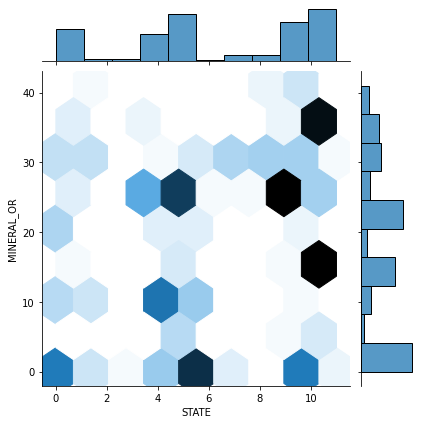

In [338]:
sns.jointplot(x="STATE",y="MINERAL_OR",data=data,kind='hex')

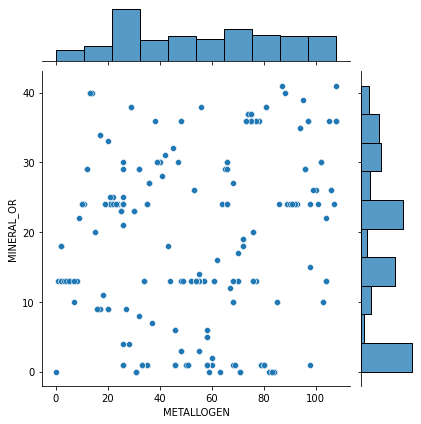

In [339]:
sns.jointplot(x="METALLOGEN",y="MINERAL_OR",data=data,kind='scatter')

In [340]:
len(data['METALLOGEN'].unique())

109

In [341]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [344]:
data["MINERAL_OR"].max()

41

In [345]:
# BALANCING THE DATA FOR CLASSIFICATION
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#print(Counter(data["MINERAL_OR"]))

In [346]:
mineral_labels = {'Fe-Hematite': 24, 'Cu': 13, 'Au': 1, 'Al-Bauxite': 0, 'Pb-Zn': 36, 'Mn': 29, 'Mn-Fe': 30, 'Cr': 10, 'Fe-Ti-V': 27, 'Be-Nb-Ta': 9, 'Cu-Pb': 18, 'Cu-Zn': 23, 'Fe-Magnetite': 26, 'WO3': 40, 'Pb-Zn-Cu': 38, 'Pb-Zn-Ag': 37, 'Fe-Hematite-Mn': 25, 'Cu-Pb-Zn': 20, 'Au-W': 6, 'Au-Cu': 3, 'Pb': 35, 'Nb-Ta-Li-Sn': 34, 'Au-Mo': 5, 'Cu-Pb-Ba': 19, 'Cu-U': 12, 'Zn': 41, 'Au-Cu-Zn': 4, 'Cu-Pb-Zn-Sb-Py': 21, 'Be': 8, 'Cr-PGE': 11, 'U': 39, 'Cs': 12, 'Nb-Ta': 33, 'Cu-Ni': 17, 'Mo-U-Cu': 32, 'Cu-Co': 14, 'Cu-Mo-Au': 16, 'Au-Ag-Cu-Pb-Zn': 2, 'Ma': 28, 'Mo': 31, 'Cu-Fe-Ti-V': 15, 'Ba': 7}

In [347]:
ros=RandomOverSampler()
X,Y=ros.fit_resample(data,data["MINERAL_OR"])
#print(Counter(Y))

In [348]:
X.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [308]:
len(X)

3318

X also contains RESERVE_AMT

# CLASSIFICATION MODEL

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
from sklearn.metrics import classification_report

# ANN

In [312]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3314,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3315,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3316,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680


In [313]:
X["MINERAL_OR"].nunique()

42

In [314]:
# Output LAyers =42
# Multiclass Classification - Softmax activation function

In [315]:
x = X.drop(["MINERAL_OR","RESERVE_AMT"],axis=1).values
y = X["MINERAL_OR"].values

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [283]:
from sklearn.preprocessing import MinMaxScaler

In [284]:
scaler = MinMaxScaler()

In [285]:
x_train = scaler.fit_transform(x_train)

In [286]:
x_test = scaler.transform(x_test)

In [44]:
import tensorflow as tf
input_shape = x_train.shape

In [45]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten)
model.add(tf.keras.layers.Dense(units=200,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=42,activation='softmax'))

In [46]:
model.build(input_shape)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2488, 200)               4600      
                                                                 
 dropout (Dropout)           (2488, 200)               0         
                                                                 
 dense_1 (Dense)             (2488, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (2488, 100)               0         
                                                                 
 dense_2 (Dense)             (2488, 42)                4242      
                                                                 
Total params: 28,942
Trainable params: 28,942
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode='max',verbose=1,patience=50)

In [51]:
model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/1000
78/78 [==============================] - 0s 3ms/step - loss: 3.7603 - accuracy: 0.0241 - val_loss: 3.7250 - val_accuracy: 0.0349
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7332 - accuracy: 0.0358 - val_loss: 3.6980 - val_accuracy: 0.0627
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7133 - accuracy: 0.0414 - val_loss: 3.6734 - val_accuracy: 0.1000
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6819 - accuracy: 0.0571 - val_loss: 3.6499 - val_accuracy: 0.1024
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6649 - accuracy: 0.0603 - val_loss: 3.6261 - val_accuracy: 0.1675
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6356 - accuracy: 0.0852 - val_loss: 3.5992 - val_accuracy: 0.2289
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6137 - accuracy: 0.0900 - val_loss: 3.5708 - val_accuracy: 0.2289
Epoch 

78/78 [==============================] - 0s 1ms/step - loss: 0.8229 - accuracy: 0.7621 - val_loss: 0.5686 - val_accuracy: 0.8337
Epoch 116/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.8496 - accuracy: 0.7452 - val_loss: 0.5638 - val_accuracy: 0.8181
Epoch 117/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.7576 - val_loss: 0.5571 - val_accuracy: 0.8361
Epoch 118/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.7492 - val_loss: 0.5548 - val_accuracy: 0.8434
Epoch 119/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.7673 - val_loss: 0.5486 - val_accuracy: 0.8470
Epoch 120/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.7476 - val_loss: 0.5475 - val_accuracy: 0.8482
Epoch 121/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8038 - accuracy: 0.7564 - val_loss: 0.5429 - val_accuracy: 0.8506
Epoch 1

Epoch 172/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.8139 - val_loss: 0.4016 - val_accuracy: 0.8687
Epoch 173/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8131 - val_loss: 0.4003 - val_accuracy: 0.8639
Epoch 174/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.8183 - val_loss: 0.4060 - val_accuracy: 0.8807
Epoch 175/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.8195 - val_loss: 0.3991 - val_accuracy: 0.8711
Epoch 176/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.8143 - val_loss: 0.3972 - val_accuracy: 0.8675
Epoch 177/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.8223 - val_loss: 0.3980 - val_accuracy: 0.8675
Epoch 178/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.8151 - val_loss: 0.3969 - val_accuracy:

Epoch 229/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8493 - val_loss: 0.3380 - val_accuracy: 0.8880
Epoch 230/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8553 - val_loss: 0.3376 - val_accuracy: 0.8916
Epoch 231/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.8589 - val_loss: 0.3386 - val_accuracy: 0.8819
Epoch 232/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8565 - val_loss: 0.3350 - val_accuracy: 0.8892
Epoch 233/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8537 - val_loss: 0.3328 - val_accuracy: 0.8916
Epoch 234/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.8453 - val_loss: 0.3285 - val_accuracy: 0.8940
Epoch 235/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8449 - val_loss: 0.3312 - val_accuracy:

Epoch 286/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8778 - val_loss: 0.2847 - val_accuracy: 0.8940
Epoch 287/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8694 - val_loss: 0.2885 - val_accuracy: 0.9012
Epoch 288/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8678 - val_loss: 0.2837 - val_accuracy: 0.9036
Epoch 289/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8706 - val_loss: 0.2942 - val_accuracy: 0.8988
Epoch 290/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8722 - val_loss: 0.2905 - val_accuracy: 0.9012
Epoch 291/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8770 - val_loss: 0.2859 - val_accuracy: 0.9036
Epoch 292/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8682 - val_loss: 0.2891 - val_accuracy:

Epoch 343/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8814 - val_loss: 0.2588 - val_accuracy: 0.9060
Epoch 344/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8818 - val_loss: 0.2637 - val_accuracy: 0.9072
Epoch 345/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8879 - val_loss: 0.2676 - val_accuracy: 0.9060
Epoch 346/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8778 - val_loss: 0.2637 - val_accuracy: 0.9072
Epoch 347/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8806 - val_loss: 0.2583 - val_accuracy: 0.9060
Epoch 348/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8794 - val_loss: 0.2600 - val_accuracy: 0.9072
Epoch 349/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8766 - val_loss: 0.2579 - val_accuracy:

Epoch 400/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.9031 - val_loss: 0.2414 - val_accuracy: 0.9145
Epoch 401/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8987 - val_loss: 0.2483 - val_accuracy: 0.9120
Epoch 402/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8947 - val_loss: 0.2452 - val_accuracy: 0.9120
Epoch 403/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8987 - val_loss: 0.2434 - val_accuracy: 0.9108
Epoch 404/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8947 - val_loss: 0.2470 - val_accuracy: 0.9108
Epoch 405/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8931 - val_loss: 0.2387 - val_accuracy: 0.9145
Epoch 406/1000
78/78 [==============================] - 0s 995us/step - loss: 0.3417 - accuracy: 0.8983 - val_loss: 0.2396 - val_accurac

Epoch 457/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.9076 - val_loss: 0.2250 - val_accuracy: 0.9205
Epoch 458/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9100 - val_loss: 0.2257 - val_accuracy: 0.9145
Epoch 459/1000
78/78 [==============================] - 0s 997us/step - loss: 0.2958 - accuracy: 0.9039 - val_loss: 0.2234 - val_accuracy: 0.9181
Epoch 460/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8991 - val_loss: 0.2200 - val_accuracy: 0.9193
Epoch 461/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.9023 - val_loss: 0.2219 - val_accuracy: 0.9181
Epoch 462/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9019 - val_loss: 0.2206 - val_accuracy: 0.9181
Epoch 463/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.9023 - val_loss: 0.2197 - val_accurac

Epoch 514/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.9156 - val_loss: 0.2184 - val_accuracy: 0.9205
Epoch 515/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.9096 - val_loss: 0.2205 - val_accuracy: 0.9229
Epoch 516/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.9128 - val_loss: 0.2113 - val_accuracy: 0.9265
Epoch 517/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.9096 - val_loss: 0.2092 - val_accuracy: 0.9241
Epoch 518/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.9172 - val_loss: 0.2111 - val_accuracy: 0.9265
Epoch 519/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.9080 - val_loss: 0.2113 - val_accuracy: 0.9265
Epoch 520/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9124 - val_loss: 0.2137 - val_accuracy:

In [52]:
model.history.history

{'loss': [3.7602810859680176,
  3.7331793308258057,
  3.713251829147339,
  3.681896209716797,
  3.6648545265197754,
  3.635634660720825,
  3.6136698722839355,
  3.58559250831604,
  3.5597405433654785,
  3.530263900756836,
  3.5034964084625244,
  3.461909770965576,
  3.430523633956909,
  3.3908064365386963,
  3.341073989868164,
  3.2773401737213135,
  3.2495296001434326,
  3.1785361766815186,
  3.1218056678771973,
  3.0748214721679688,
  3.0250816345214844,
  2.9632890224456787,
  2.8782553672790527,
  2.8184053897857666,
  2.7531228065490723,
  2.7115094661712646,
  2.662407398223877,
  2.5899291038513184,
  2.525393486022949,
  2.452467679977417,
  2.4189071655273438,
  2.3745577335357666,
  2.268447160720825,
  2.2228987216949463,
  2.1845321655273438,
  2.1290221214294434,
  2.1151797771453857,
  2.0632596015930176,
  2.019937753677368,
  1.9901666641235352,
  1.9208004474639893,
  1.8820563554763794,
  1.8676891326904297,
  1.8259962797164917,
  1.823909044265747,
  1.7547477483749

In [53]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

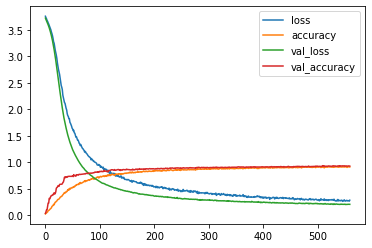

In [54]:
model_loss.plot()

In [55]:
model_loss["accuracy"].max()

0.9204180240631104

In [56]:
y_pred=np.argmax(model.predict(x_test), axis=1)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      0.64      0.77        28
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        20
           6       0.96      1.00      0.98        24
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        14
           9       1.00      0.54      0.70        28
          10       0.94      1.00      0.97        15
          11       0.95      1.00      0.98        21
          12       1.00      1.00      1.00        20
          13       0.87      0.54      0.67        24
          14       0.89      1.00      0.94        17
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        12
          17       0.92    

In [59]:
#from keras.models import load_model
#model.save('Saved Models/classify-minerals.h5')

# REGRESSION MODEL

In [60]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3316,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987


In [61]:
x = X.drop(["RESERVE_AMT"],axis=1).values
y = X["RESERVE_AMT"].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# We dont fit to our test set
X_test = scaler.transform(X_test)
import tensorflow as tf
#Lets take a look at the shape of the feature data
X_train.shape

(2322, 23)

In [64]:
model = tf.keras.models.Sequential()
# No. of neurons = Size of our feature data
model.add(tf.keras.layers.Dense(23,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
# This may over fit the training data
# We will able to check it by passing the validation data along with our training data
model.add(tf.keras.layers.Dense(1))
# adam optimizer is a good opitmizer
# Since a regression problem, and we choosing a continuous label i.e price,loss = 'mse'
model.compile(optimizer='adam',loss='mse')

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose=1,patience=50)

In [66]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=5000,callbacks=[early_stop])

Epoch 1/5000
19/19 [==============================] - 0s 4ms/step - loss: 1536101764300800.0000 - val_loss: 839656778235904.0000
Epoch 2/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536101630083072.0000 - val_loss: 839656778235904.0000
Epoch 3/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536101764300800.0000 - val_loss: 839656778235904.0000
Epoch 4/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536101764300800.0000 - val_loss: 839656778235904.0000
Epoch 5/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536101764300800.0000 - val_loss: 839656778235904.0000
Epoch 6/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536101630083072.0000 - val_loss: 839656778235904.0000
Epoch 7/5000
19/19 [==============================] - 0s 1ms/step - loss: 1536101495865344.0000 - val_loss: 839656778235904.0000
Epoch 8/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536101630083072.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 1535783534067712.0000 - val_loss: 839476389609472.0000
Epoch 65/5000
19/19 [==============================] - 0s 1ms/step - loss: 1535754408820736.0000 - val_loss: 839464846884864.0000
Epoch 66/5000
19/19 [==============================] - 0s 1ms/step - loss: 1535776554745856.0000 - val_loss: 839452901507072.0000
Epoch 67/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535735886774272.0000 - val_loss: 839441023238144.0000
Epoch 68/5000
19/19 [==============================] - 0s 1ms/step - loss: 1535716827856896.0000 - val_loss: 839427937009664.0000
Epoch 69/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535669180563456.0000 - val_loss: 839413105950720.0000
Epoch 70/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535687568392192.0000 - val_loss: 839398677544960.0000
Epoch 71/5000
19/19 [==============================] - 0s 1ms/step - loss: 1535587576184832.0000 - val_l

Epoch 127/5000
19/19 [==============================] - 0s 1ms/step - loss: 1531763713114112.0000 - val_loss: 837103151742976.0000
Epoch 128/5000
19/19 [==============================] - 0s 1ms/step - loss: 1531490311602176.0000 - val_loss: 837036781076480.0000
Epoch 129/5000
19/19 [==============================] - 0s 1ms/step - loss: 1531473668603904.0000 - val_loss: 836965981224960.0000
Epoch 130/5000
19/19 [==============================] - 0s 2ms/step - loss: 1531591645986816.0000 - val_loss: 836905449029632.0000
Epoch 131/5000
19/19 [==============================] - 0s 2ms/step - loss: 1531362133671936.0000 - val_loss: 836836394008576.0000
Epoch 132/5000
19/19 [==============================] - 0s 2ms/step - loss: 1530891700535296.0000 - val_loss: 836771969499136.0000
Epoch 133/5000
19/19 [==============================] - 0s 2ms/step - loss: 1531764786855936.0000 - val_loss: 836706471247872.0000
Epoch 134/5000
19/19 [==============================] - 0s 1ms/step - loss: 1530719

19/19 [==============================] - 0s 2ms/step - loss: 1504465169416192.0000 - val_loss: 819527474479104.0000
Epoch 252/5000
19/19 [==============================] - 0s 2ms/step - loss: 1505242961149952.0000 - val_loss: 819318161932288.0000
Epoch 253/5000
19/19 [==============================] - 0s 2ms/step - loss: 1501419232296960.0000 - val_loss: 819112607481856.0000
Epoch 254/5000
19/19 [==============================] - 0s 2ms/step - loss: 1490456059838464.0000 - val_loss: 818879538397184.0000
Epoch 255/5000
19/19 [==============================] - 0s 1ms/step - loss: 1493441598980096.0000 - val_loss: 818633718628352.0000
Epoch 256/5000
19/19 [==============================] - 0s 1ms/step - loss: 1488650965614592.0000 - val_loss: 818388704165888.0000
Epoch 257/5000
19/19 [==============================] - 0s 2ms/step - loss: 1500066451816448.0000 - val_loss: 818098055675904.0000
Epoch 258/5000
19/19 [==============================] - 0s 1ms/step - loss: 1500793911902208.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1423520068272128.0000 - val_loss: 786057062776832.0000
Epoch 376/5000
19/19 [==============================] - 0s 1ms/step - loss: 1431318386704384.0000 - val_loss: 785689507528704.0000
Epoch 377/5000
19/19 [==============================] - 0s 2ms/step - loss: 1429587783319552.0000 - val_loss: 785342688919552.0000
Epoch 378/5000
19/19 [==============================] - 0s 2ms/step - loss: 1438845585326080.0000 - val_loss: 785010298716160.0000
Epoch 379/5000
19/19 [==============================] - 0s 1ms/step - loss: 1438474339090432.0000 - val_loss: 784693209333760.0000
Epoch 380/5000
19/19 [==============================] - 0s 2ms/step - loss: 1440016635002880.0000 - val_loss: 784331425447936.0000
Epoch 381/5000
19/19 [==============================] - 0s 2ms/step - loss: 1422895016312832.0000 - val_loss: 783994471841792.0000
Epoch 382/5000
19/19 [==============================] - 0s 2ms/step - loss: 1440221585473536.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1377305951731712.0000 - val_loss: 743440920870912.0000
Epoch 500/5000
19/19 [==============================] - 0s 2ms/step - loss: 1376034238758912.0000 - val_loss: 743118664105984.0000
Epoch 501/5000
19/19 [==============================] - 0s 2ms/step - loss: 1345528562450432.0000 - val_loss: 742759430356992.0000
Epoch 502/5000
19/19 [==============================] - 0s 1ms/step - loss: 1328989851353088.0000 - val_loss: 742287386607616.0000
Epoch 503/5000
19/19 [==============================] - 0s 2ms/step - loss: 1346007451303936.0000 - val_loss: 741885471621120.0000
Epoch 504/5000
19/19 [==============================] - 0s 2ms/step - loss: 1366274596667392.0000 - val_loss: 741534693588992.0000
Epoch 505/5000
19/19 [==============================] - 0s 2ms/step - loss: 1356869155160064.0000 - val_loss: 741180627222528.0000
Epoch 506/5000
19/19 [==============================] - 0s 2ms/step - loss: 1351372133892096.0000 

19/19 [==============================] - 0s 1ms/step - loss: 1264026591952896.0000 - val_loss: 697456383754240.0000
Epoch 624/5000
19/19 [==============================] - 0s 2ms/step - loss: 1261488266280960.0000 - val_loss: 697106612355072.0000
Epoch 625/5000
19/19 [==============================] - 0s 2ms/step - loss: 1270188930498560.0000 - val_loss: 696693020426240.0000
Epoch 626/5000
19/19 [==============================] - 0s 2ms/step - loss: 1262568316338176.0000 - val_loss: 696314660651008.0000
Epoch 627/5000
19/19 [==============================] - 0s 2ms/step - loss: 1285907168624640.0000 - val_loss: 695921335599104.0000
Epoch 628/5000
19/19 [==============================] - 0s 2ms/step - loss: 1267832201412608.0000 - val_loss: 695494053462016.0000
Epoch 629/5000
19/19 [==============================] - 0s 2ms/step - loss: 1293610460905472.0000 - val_loss: 695158844686336.0000
Epoch 630/5000
19/19 [==============================] - 0s 1ms/step - loss: 1284767794331648.0000 

19/19 [==============================] - 0s 1ms/step - loss: 1190328308596736.0000 - val_loss: 651760481861632.0000
Epoch 748/5000
19/19 [==============================] - 0s 2ms/step - loss: 1200612070916096.0000 - val_loss: 651410173591552.0000
Epoch 749/5000
19/19 [==============================] - 0s 1ms/step - loss: 1173706114072576.0000 - val_loss: 651079058456576.0000
Epoch 750/5000
19/19 [==============================] - 0s 1ms/step - loss: 1242474714497024.0000 - val_loss: 650678485647360.0000
Epoch 751/5000
19/19 [==============================] - 0s 2ms/step - loss: 1244792923095040.0000 - val_loss: 650398574575616.0000
Epoch 752/5000
19/19 [==============================] - 0s 2ms/step - loss: 1191745782022144.0000 - val_loss: 650049742700544.0000
Epoch 753/5000
19/19 [==============================] - 0s 2ms/step - loss: 1187447861936128.0000 - val_loss: 649640512847872.0000
Epoch 754/5000
19/19 [==============================] - 0s 2ms/step - loss: 1213445164761088.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1133098540466176.0000 - val_loss: 613056988053504.0000
Epoch 872/5000
19/19 [==============================] - 0s 2ms/step - loss: 1180191380471808.0000 - val_loss: 612750568980480.0000
Epoch 873/5000
19/19 [==============================] - 0s 2ms/step - loss: 1204794026885120.0000 - val_loss: 612520452685824.0000
Epoch 874/5000
19/19 [==============================] - 0s 1ms/step - loss: 1175151773220864.0000 - val_loss: 612232824094720.0000
Epoch 875/5000
19/19 [==============================] - 0s 1ms/step - loss: 1179730342576128.0000 - val_loss: 612006667223040.0000
Epoch 876/5000
19/19 [==============================] - 0s 1ms/step - loss: 1112007432470528.0000 - val_loss: 611675149434880.0000
Epoch 877/5000
19/19 [==============================] - 0s 1ms/step - loss: 1118659799941120.0000 - val_loss: 611290749861888.0000
Epoch 878/5000
19/19 [==============================] - 0s 1ms/step - loss: 1134484875378688.0000 

19/19 [==============================] - 0s 1ms/step - loss: 1064982103982080.0000 - val_loss: 581701445091328.0000
Epoch 996/5000
19/19 [==============================] - 0s 1ms/step - loss: 1111246485061632.0000 - val_loss: 581484213698560.0000
Epoch 997/5000
19/19 [==============================] - 0s 1ms/step - loss: 1165469843193856.0000 - val_loss: 581291477041152.0000
Epoch 998/5000
19/19 [==============================] - 0s 1ms/step - loss: 1023879468285952.0000 - val_loss: 581039818801152.0000
Epoch 999/5000
19/19 [==============================] - 0s 1ms/step - loss: 1063800249778176.0000 - val_loss: 580731252244480.0000
Epoch 1000/5000
19/19 [==============================] - 0s 1ms/step - loss: 1084067529359360.0000 - val_loss: 580496773873664.0000
Epoch 1001/5000
19/19 [==============================] - 0s 1ms/step - loss: 1037296073703424.0000 - val_loss: 580327927971840.0000
Epoch 1002/5000
19/19 [==============================] - 0s 2ms/step - loss: 1138820644864000.00

19/19 [==============================] - 0s 1ms/step - loss: 1074848247840768.0000 - val_loss: 559017273327616.0000
Epoch 1120/5000
19/19 [==============================] - 0s 1ms/step - loss: 1044917090516992.0000 - val_loss: 558786922151936.0000
Epoch 1121/5000
19/19 [==============================] - 0s 2ms/step - loss: 1068314193297408.0000 - val_loss: 558612606877696.0000
Epoch 1122/5000
19/19 [==============================] - 0s 1ms/step - loss: 1085388298911744.0000 - val_loss: 558443458985984.0000
Epoch 1123/5000
19/19 [==============================] - 0s 2ms/step - loss: 1077943442866176.0000 - val_loss: 558293000912896.0000
Epoch 1124/5000
19/19 [==============================] - 0s 2ms/step - loss: 1135855909470208.0000 - val_loss: 558146737143808.0000
Epoch 1125/5000
19/19 [==============================] - 0s 2ms/step - loss: 1101134856978432.0000 - val_loss: 558063387934720.0000
Epoch 1126/5000
19/19 [==============================] - 0s 2ms/step - loss: 102203041775616

19/19 [==============================] - 0s 2ms/step - loss: 1011596868452352.0000 - val_loss: 539507854147584.0000
Epoch 1244/5000
19/19 [==============================] - 0s 2ms/step - loss: 957876289929216.0000 - val_loss: 539348772585472.0000
Epoch 1245/5000
19/19 [==============================] - 0s 1ms/step - loss: 1041864106967040.0000 - val_loss: 539143083917312.0000
Epoch 1246/5000
19/19 [==============================] - 0s 2ms/step - loss: 1037975685169152.0000 - val_loss: 539077485002752.0000
Epoch 1247/5000
19/19 [==============================] - 0s 2ms/step - loss: 1001753810042880.0000 - val_loss: 538878473666560.0000
Epoch 1248/5000
19/19 [==============================] - 0s 2ms/step - loss: 1025063872626688.0000 - val_loss: 538673053433856.0000
Epoch 1249/5000
19/19 [==============================] - 0s 2ms/step - loss: 1092389431148544.0000 - val_loss: 538550747529216.0000
Epoch 1250/5000
19/19 [==============================] - 0s 2ms/step - loss: 1079509226881024

19/19 [==============================] - 0s 2ms/step - loss: 980425874866176.0000 - val_loss: 521110663725056.0000
Epoch 1368/5000
19/19 [==============================] - 0s 2ms/step - loss: 987151592325120.0000 - val_loss: 520931919265792.0000
Epoch 1369/5000
19/19 [==============================] - 0s 2ms/step - loss: 1047540308901888.0000 - val_loss: 520726801022976.0000
Epoch 1370/5000
19/19 [==============================] - 0s 2ms/step - loss: 930800748986368.0000 - val_loss: 520550438928384.0000
Epoch 1371/5000
19/19 [==============================] - 0s 2ms/step - loss: 935108936728576.0000 - val_loss: 520394377265152.0000
Epoch 1372/5000
19/19 [==============================] - 0s 2ms/step - loss: 890162036867072.0000 - val_loss: 520164059643904.0000
Epoch 1373/5000
19/19 [==============================] - 0s 2ms/step - loss: 995406855012352.0000 - val_loss: 519998569185280.0000
Epoch 1374/5000
19/19 [==============================] - 0s 2ms/step - loss: 1022728148615168.0000

19/19 [==============================] - 0s 2ms/step - loss: 1028721439932416.0000 - val_loss: 501971719028736.0000
Epoch 1492/5000
19/19 [==============================] - 0s 1ms/step - loss: 869568541097984.0000 - val_loss: 501710128676864.0000
Epoch 1493/5000
19/19 [==============================] - 0s 2ms/step - loss: 895252042874880.0000 - val_loss: 501556147388416.0000
Epoch 1494/5000
19/19 [==============================] - 0s 2ms/step - loss: 983788968476672.0000 - val_loss: 501346734178304.0000
Epoch 1495/5000
19/19 [==============================] - 0s 2ms/step - loss: 1007159294820352.0000 - val_loss: 501212952657920.0000
Epoch 1496/5000
19/19 [==============================] - 0s 2ms/step - loss: 1067240787017728.0000 - val_loss: 501142186360832.0000
Epoch 1497/5000
19/19 [==============================] - 0s 2ms/step - loss: 924068320641024.0000 - val_loss: 500969448144896.0000
Epoch 1498/5000
19/19 [==============================] - 0s 2ms/step - loss: 952057951420416.000

19/19 [==============================] - 0s 2ms/step - loss: 993349230133248.0000 - val_loss: 483605868445696.0000
Epoch 1616/5000
19/19 [==============================] - 0s 1ms/step - loss: 923404681084928.0000 - val_loss: 483427996401664.0000
Epoch 1617/5000
19/19 [==============================] - 0s 2ms/step - loss: 905882422476800.0000 - val_loss: 483306831347712.0000
Epoch 1618/5000
19/19 [==============================] - 0s 2ms/step - loss: 941393279188992.0000 - val_loss: 483154594889728.0000
Epoch 1619/5000
19/19 [==============================] - 0s 2ms/step - loss: 974825237512192.0000 - val_loss: 482909815308288.0000
Epoch 1620/5000
19/19 [==============================] - 0s 2ms/step - loss: 920678249267200.0000 - val_loss: 482716944433152.0000
Epoch 1621/5000
19/19 [==============================] - 0s 2ms/step - loss: 989000709963776.0000 - val_loss: 482603094245376.0000
Epoch 1622/5000
19/19 [==============================] - 0s 1ms/step - loss: 984321074659328.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 906369498611712.0000 - val_loss: 463761005608960.0000
Epoch 1740/5000
19/19 [==============================] - 0s 2ms/step - loss: 922377579921408.0000 - val_loss: 463741510483968.0000
Epoch 1741/5000
19/19 [==============================] - 0s 2ms/step - loss: 862983483817984.0000 - val_loss: 463535956033536.0000
Epoch 1742/5000
19/19 [==============================] - 0s 2ms/step - loss: 809259012980736.0000 - val_loss: 463302249414656.0000
Epoch 1743/5000
19/19 [==============================] - 0s 1ms/step - loss: 914090910285824.0000 - val_loss: 463285807742976.0000
Epoch 1744/5000
19/19 [==============================] - 0s 1ms/step - loss: 873018809122816.0000 - val_loss: 463106157314048.0000
Epoch 1745/5000
19/19 [==============================] - 0s 2ms/step - loss: 932287948521472.0000 - val_loss: 462973113991168.0000
Epoch 1746/5000
19/19 [==============================] - 0s 1ms/step - loss: 952237668958208.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 920875348000768.0000 - val_loss: 441996258836480.0000
Epoch 1864/5000
19/19 [==============================] - 0s 2ms/step - loss: 831378295881728.0000 - val_loss: 441829124210688.0000
Epoch 1865/5000
19/19 [==============================] - 0s 1ms/step - loss: 929636275978240.0000 - val_loss: 441625415254016.0000
Epoch 1866/5000
19/19 [==============================] - 0s 2ms/step - loss: 826029249658880.0000 - val_loss: 441402043400192.0000
Epoch 1867/5000
19/19 [==============================] - 0s 1ms/step - loss: 901757844586496.0000 - val_loss: 441209038307328.0000
Epoch 1868/5000
19/19 [==============================] - 0s 2ms/step - loss: 1019437398360064.0000 - val_loss: 441087168610304.0000
Epoch 1869/5000
19/19 [==============================] - 0s 1ms/step - loss: 880951949262848.0000 - val_loss: 440843999641600.0000
Epoch 1870/5000
19/19 [==============================] - 0s 2ms/step - loss: 1005158779584512.0000

19/19 [==============================] - 0s 2ms/step - loss: 660442221379584.0000 - val_loss: 419197364469760.0000
Epoch 1988/5000
19/19 [==============================] - 0s 1ms/step - loss: 845554439421952.0000 - val_loss: 418998722232320.0000
Epoch 1989/5000
19/19 [==============================] - 0s 2ms/step - loss: 913616047964160.0000 - val_loss: 418854572392448.0000
Epoch 1990/5000
19/19 [==============================] - 0s 2ms/step - loss: 945426521915392.0000 - val_loss: 418660694884352.0000
Epoch 1991/5000
19/19 [==============================] - 0s 2ms/step - loss: 971733733474304.0000 - val_loss: 418490506805248.0000
Epoch 1992/5000
19/19 [==============================] - 0s 2ms/step - loss: 999896907776000.0000 - val_loss: 418324345257984.0000
Epoch 1993/5000
19/19 [==============================] - 0s 2ms/step - loss: 903421607542784.0000 - val_loss: 418157512622080.0000
Epoch 1994/5000
19/19 [==============================] - 0s 1ms/step - loss: 855880681652224.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 829067402149888.0000 - val_loss: 393837428080640.0000
Epoch 2112/5000
19/19 [==============================] - 0s 1ms/step - loss: 784240291610624.0000 - val_loss: 393575401521152.0000
Epoch 2113/5000
19/19 [==============================] - 0s 2ms/step - loss: 773098542465024.0000 - val_loss: 393334682025984.0000
Epoch 2114/5000
19/19 [==============================] - 0s 2ms/step - loss: 888112062398464.0000 - val_loss: 393107216531456.0000
Epoch 2115/5000
19/19 [==============================] - 0s 2ms/step - loss: 792914984697856.0000 - val_loss: 392882368282624.0000
Epoch 2116/5000
19/19 [==============================] - 0s 1ms/step - loss: 802158425407488.0000 - val_loss: 392732010872832.0000
Epoch 2117/5000
19/19 [==============================] - 0s 1ms/step - loss: 768558762033152.0000 - val_loss: 392645876645888.0000
Epoch 2118/5000
19/19 [==============================] - 0s 2ms/step - loss: 872724201209856.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 851376871571456.0000 - val_loss: 367262083055616.0000
Epoch 2236/5000
19/19 [==============================] - 0s 2ms/step - loss: 831077581062144.0000 - val_loss: 367224300765184.0000
Epoch 2237/5000
19/19 [==============================] - 0s 1ms/step - loss: 779794262261760.0000 - val_loss: 367044616781824.0000
Epoch 2238/5000
19/19 [==============================] - 0s 2ms/step - loss: 882426733658112.0000 - val_loss: 366964321026048.0000
Epoch 2239/5000
19/19 [==============================] - 0s 2ms/step - loss: 828060433645568.0000 - val_loss: 367243963662336.0000
Epoch 2240/5000
19/19 [==============================] - 0s 2ms/step - loss: 768526281342976.0000 - val_loss: 367105652293632.0000
Epoch 2241/5000
19/19 [==============================] - 0s 2ms/step - loss: 892712979005440.0000 - val_loss: 366868892221440.0000
Epoch 2242/5000
19/19 [==============================] - 0s 2ms/step - loss: 669415414693888.0000 -

19/19 [==============================] - 0s 1ms/step - loss: 833116549677056.0000 - val_loss: 342291243859968.0000
Epoch 2360/5000
19/19 [==============================] - 0s 2ms/step - loss: 767704130650112.0000 - val_loss: 341866478305280.0000
Epoch 2361/5000
19/19 [==============================] - 0s 1ms/step - loss: 725759480037376.0000 - val_loss: 341391313993728.0000
Epoch 2362/5000
19/19 [==============================] - 0s 1ms/step - loss: 723857749049344.0000 - val_loss: 341037717389312.0000
Epoch 2363/5000
19/19 [==============================] - 0s 2ms/step - loss: 872146729435136.0000 - val_loss: 341007652618240.0000
Epoch 2364/5000
19/19 [==============================] - 0s 2ms/step - loss: 856920936153088.0000 - val_loss: 340876052135936.0000
Epoch 2365/5000
19/19 [==============================] - 0s 2ms/step - loss: 618113909391360.0000 - val_loss: 340610770796544.0000
Epoch 2366/5000
19/19 [==============================] - 0s 2ms/step - loss: 678234526056448.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 648320749928448.0000 - val_loss: 312106415030272.0000
Epoch 2484/5000
19/19 [==============================] - 0s 2ms/step - loss: 795361035681792.0000 - val_loss: 311909953830912.0000
Epoch 2485/5000
19/19 [==============================] - 0s 2ms/step - loss: 772577643462656.0000 - val_loss: 311610279198720.0000
Epoch 2486/5000
19/19 [==============================] - 0s 1ms/step - loss: 824970070458368.0000 - val_loss: 311447674421248.0000
Epoch 2487/5000
19/19 [==============================] - 0s 1ms/step - loss: 619050413588480.0000 - val_loss: 311393987330048.0000
Epoch 2488/5000
19/19 [==============================] - 0s 1ms/step - loss: 788496067330048.0000 - val_loss: 311080354054144.0000
Epoch 2489/5000
19/19 [==============================] - 0s 2ms/step - loss: 647792200515584.0000 - val_loss: 310815039160320.0000
Epoch 2490/5000
19/19 [==============================] - 0s 2ms/step - loss: 669471316377600.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 783253522874368.0000 - val_loss: 287367638286336.0000
Epoch 2608/5000
19/19 [==============================] - 0s 1ms/step - loss: 806564659200000.0000 - val_loss: 287241406513152.0000
Epoch 2609/5000
19/19 [==============================] - 0s 2ms/step - loss: 777315193716736.0000 - val_loss: 287072359284736.0000
Epoch 2610/5000
19/19 [==============================] - 0s 2ms/step - loss: 684734891950080.0000 - val_loss: 286628266377216.0000
Epoch 2611/5000
19/19 [==============================] - 0s 2ms/step - loss: 734027426299904.0000 - val_loss: 286480257777664.0000
Epoch 2612/5000
19/19 [==============================] - 0s 1ms/step - loss: 707470636875776.0000 - val_loss: 286467205103616.0000
Epoch 2613/5000
19/19 [==============================] - 0s 1ms/step - loss: 770231450468352.0000 - val_loss: 286245745852416.0000
Epoch 2614/5000
19/19 [==============================] - 0s 2ms/step - loss: 645577742221312.0000 -

19/19 [==============================] - 0s 1ms/step - loss: 608181126430720.0000 - val_loss: 263331407462400.0000
Epoch 2732/5000
19/19 [==============================] - 0s 1ms/step - loss: 724195843506176.0000 - val_loss: 263318187016192.0000
Epoch 2733/5000
19/19 [==============================] - 0s 2ms/step - loss: 673636964892672.0000 - val_loss: 263121641930752.0000
Epoch 2734/5000
19/19 [==============================] - 0s 1ms/step - loss: 755475553452032.0000 - val_loss: 262944927514624.0000
Epoch 2735/5000
19/19 [==============================] - 0s 1ms/step - loss: 682018996224000.0000 - val_loss: 262989320028160.0000
Epoch 2736/5000
19/19 [==============================] - 0s 2ms/step - loss: 717587633668096.0000 - val_loss: 262977659863040.0000
Epoch 2737/5000
19/19 [==============================] - 0s 2ms/step - loss: 810761513336832.0000 - val_loss: 262800056254464.0000
Epoch 2738/5000
19/19 [==============================] - 0s 2ms/step - loss: 777162319724544.0000 -

19/19 [==============================] - 0s 1ms/step - loss: 608492578668544.0000 - val_loss: 243706762362880.0000
Epoch 2856/5000
19/19 [==============================] - 0s 2ms/step - loss: 722487721590784.0000 - val_loss: 243272400240640.0000
Epoch 2857/5000
19/19 [==============================] - 0s 2ms/step - loss: 697035141414912.0000 - val_loss: 243276946866176.0000
Epoch 2858/5000
19/19 [==============================] - 0s 1ms/step - loss: 797895938801664.0000 - val_loss: 243047568769024.0000
Epoch 2859/5000
19/19 [==============================] - 0s 1ms/step - loss: 607966982045696.0000 - val_loss: 242712091557888.0000
Epoch 2860/5000
19/19 [==============================] - 0s 2ms/step - loss: 588215970955264.0000 - val_loss: 242631779024896.0000
Epoch 2861/5000
19/19 [==============================] - 0s 2ms/step - loss: 581153970978816.0000 - val_loss: 242794685792256.0000
Epoch 2862/5000
19/19 [==============================] - 0s 2ms/step - loss: 753853465100288.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 774390992076800.0000 - val_loss: 228755410780160.0000
Epoch 2980/5000
19/19 [==============================] - 0s 2ms/step - loss: 528048982065152.0000 - val_loss: 228321786855424.0000
Epoch 2981/5000
19/19 [==============================] - 0s 1ms/step - loss: 751317622456320.0000 - val_loss: 228173895696384.0000
Epoch 2982/5000
19/19 [==============================] - 0s 1ms/step - loss: 710664817475584.0000 - val_loss: 227985370120192.0000
Epoch 2983/5000
19/19 [==============================] - 0s 2ms/step - loss: 675925914025984.0000 - val_loss: 227715357605888.0000
Epoch 2984/5000
19/19 [==============================] - 0s 1ms/step - loss: 674209873264640.0000 - val_loss: 227355234664448.0000
Epoch 2985/5000
19/19 [==============================] - 0s 2ms/step - loss: 547906260041728.0000 - val_loss: 227119380561920.0000
Epoch 2986/5000
19/19 [==============================] - 0s 2ms/step - loss: 771932190408704.0000 -

19/19 [==============================] - 0s 1ms/step - loss: 636229745901568.0000 - val_loss: 211543849435136.0000
Epoch 3104/5000
19/19 [==============================] - 0s 2ms/step - loss: 758394520600576.0000 - val_loss: 211384784650240.0000
Epoch 3105/5000
19/19 [==============================] - 0s 2ms/step - loss: 621283528146944.0000 - val_loss: 211461322309632.0000
Epoch 3106/5000
19/19 [==============================] - 0s 1ms/step - loss: 620561503879168.0000 - val_loss: 211695448358912.0000
Epoch 3107/5000
19/19 [==============================] - 0s 1ms/step - loss: 593343893471232.0000 - val_loss: 212724998995968.0000
Epoch 3108/5000
19/19 [==============================] - 0s 2ms/step - loss: 575458911453184.0000 - val_loss: 212182071508992.0000
Epoch 3109/5000
19/19 [==============================] - 0s 1ms/step - loss: 664543848038400.0000 - val_loss: 212299528798208.0000
Epoch 3110/5000
19/19 [==============================] - 0s 2ms/step - loss: 629120098631680.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 605735813644288.0000 - val_loss: 203285097086976.0000
Epoch 3228/5000
19/19 [==============================] - 0s 2ms/step - loss: 589646463500288.0000 - val_loss: 202940023308288.0000
Epoch 3229/5000
19/19 [==============================] - 0s 2ms/step - loss: 678597048139776.0000 - val_loss: 202618538295296.0000
Epoch 3230/5000
19/19 [==============================] - 0s 2ms/step - loss: 455765991096320.0000 - val_loss: 202409762619392.0000
Epoch 3231/5000
19/19 [==============================] - 0s 2ms/step - loss: 607501045202944.0000 - val_loss: 202363507834880.0000
Epoch 3232/5000
19/19 [==============================] - 0s 1ms/step - loss: 517691467104256.0000 - val_loss: 202302086447104.0000
Epoch 3233/5000
19/19 [==============================] - 0s 2ms/step - loss: 539719515504640.0000 - val_loss: 202102924115968.0000
Epoch 3234/5000
19/19 [==============================] - 0s 2ms/step - loss: 671104813236224.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 645066641113088.0000 - val_loss: 195803146616832.0000
Epoch 3352/5000
19/19 [==============================] - 0s 1ms/step - loss: 726339233513472.0000 - val_loss: 195706744733696.0000
Epoch 3353/5000
19/19 [==============================] - 0s 2ms/step - loss: 729436307587072.0000 - val_loss: 195528251932672.0000
Epoch 3354/5000
19/19 [==============================] - 0s 2ms/step - loss: 669370653081600.0000 - val_loss: 195155965509632.0000
Epoch 3355/5000
19/19 [==============================] - 0s 1ms/step - loss: 699129139298304.0000 - val_loss: 194921000599552.0000
Epoch 3356/5000
19/19 [==============================] - 0s 2ms/step - loss: 616138694197248.0000 - val_loss: 195047064600576.0000
Epoch 3357/5000
19/19 [==============================] - 0s 2ms/step - loss: 529137085186048.0000 - val_loss: 194635083284480.0000
Epoch 3358/5000
19/19 [==============================] - 0s 2ms/step - loss: 585136546512896.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 575728621977600.0000 - val_loss: 188818623823872.0000
Epoch 3476/5000
19/19 [==============================] - 0s 2ms/step - loss: 646605380255744.0000 - val_loss: 188606039719936.0000
Epoch 3477/5000
19/19 [==============================] - 0s 2ms/step - loss: 527935568084992.0000 - val_loss: 188478348328960.0000
Epoch 3478/5000
19/19 [==============================] - 0s 2ms/step - loss: 498123797430272.0000 - val_loss: 188542269521920.0000
Epoch 3479/5000
19/19 [==============================] - 0s 2ms/step - loss: 572989238149120.0000 - val_loss: 188357770477568.0000
Epoch 3480/5000
19/19 [==============================] - 0s 2ms/step - loss: 691453294542848.0000 - val_loss: 188374883237888.0000
Epoch 3481/5000
19/19 [==============================] - 0s 2ms/step - loss: 709716703444992.0000 - val_loss: 188878635925504.0000
Epoch 3482/5000
19/19 [==============================] - 0s 1ms/step - loss: 581117597974528.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 637926392201216.0000 - val_loss: 183417853444096.0000
Epoch 3600/5000
19/19 [==============================] - 0s 2ms/step - loss: 629720454529024.0000 - val_loss: 183161413697536.0000
Epoch 3601/5000
19/19 [==============================] - 0s 2ms/step - loss: 726721552711680.0000 - val_loss: 183270314606592.0000
Epoch 3602/5000
19/19 [==============================] - 0s 2ms/step - loss: 671114879565824.0000 - val_loss: 183345157767168.0000
Epoch 3603/5000
19/19 [==============================] - 0s 2ms/step - loss: 477417189670912.0000 - val_loss: 183156397309952.0000
Epoch 3604/5000
19/19 [==============================] - 0s 2ms/step - loss: 548845582811136.0000 - val_loss: 182837210775552.0000
Epoch 3605/5000
19/19 [==============================] - 0s 1ms/step - loss: 678202984890368.0000 - val_loss: 182932035600384.0000
Epoch 3606/5000
19/19 [==============================] - 0s 2ms/step - loss: 673543012483072.0000 -

In [67]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,1.536102e+15,8.396568e+14
1,1.536102e+15,8.396568e+14
2,1.536102e+15,8.396568e+14
3,1.536102e+15,8.396568e+14
4,1.536102e+15,8.396568e+14
...,...,...
3674,7.142164e+14,1.865042e+14
3675,5.077093e+14,1.865380e+14
3676,6.087154e+14,1.862198e+14
3677,6.448024e+14,1.866780e+14


<AxesSubplot:>

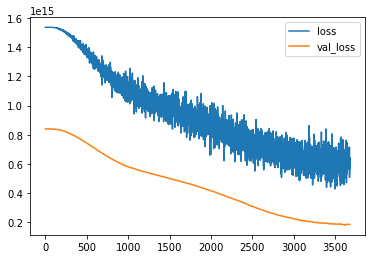

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [70]:
predictions = model.predict(X_test)

In [71]:
predictions

array([[4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [1.3525402e+08],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [1.3525402e+08],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.2690277e+01],
       [4.269027

In [72]:
np.sqrt(mean_squared_error(y_test,predictions))

13659120.126792114

In [73]:
mean_absolute_error(y_test,predictions)

1964647.31690382

In [74]:
X['RESERVE_AMT'].describe()

count    3.318000e+03
mean     5.789086e+06
std      3.597108e+07
min      5.800000e-02
25%      2.150000e+00
50%      4.486500e+01
75%      3.814600e+04
max      2.360000e+08
Name: RESERVE_AMT, dtype: float64

In [75]:
1610640/5784258.0

0.27845230969987855

In [76]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.7763967891058051

In [77]:
#model.save('Saved Models/calculate-mineral.h5')

## LOADING THE SAVED MODEL

In [78]:
from keras.models import load_model
model_final = load_model('Saved Models/classify-minerals.h5')

In [79]:
inputs = x_test[0]

In [80]:
inputs

array([0.61320755, 0.13758389, 0.36363636, 0.95238095, 0.42063492,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

In [81]:
inputs.shape

(22,)

In [82]:
inputs=inputs.reshape(1,-1)

In [83]:
prediction = model_final.predict(inputs)

In [84]:
print(prediction)

[[2.2625124e-04 3.0876592e-05 7.6570686e-08 5.9991179e-12 5.5942201e-10
  3.8651802e-09 9.2429536e-12 1.7297707e-06 2.3870297e-09 2.8798326e-05
  8.3603151e-04 3.4213686e-04 9.9848878e-01 2.9052565e-06 3.0834020e-12
  1.7070855e-09 5.0102980e-09 7.7573963e-12 7.1763007e-10 9.8974180e-09
  5.8695900e-12 2.0820859e-07 1.5295208e-06 2.1045483e-11 5.6165494e-08
  2.9769559e-10 1.8051452e-08 1.1517127e-05 1.4034116e-10 9.5205105e-06
  1.4621056e-05 1.4670673e-10 3.1158533e-12 1.9535693e-07 2.7780693e-06
  2.7311728e-10 2.1501953e-07 1.6497984e-10 4.9411229e-13 2.5897947e-07
  1.3858516e-06 1.7622268e-11]]


In [85]:
prediction.argmax()

12

In [86]:
y_pred=np.argmax(prediction, axis=1)
y_pred

array([12], dtype=int64)

In [87]:
prediction.max()

0.9984888